In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataframe = pd.read_csv("/content/diabetes (1).csv")
dataframe.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
dataframe.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
dataframe

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
X = dataframe.drop('Outcome', axis = 1)
y = dataframe['Outcome']

In [ ]:
from sklearn.impute import KNNImputer
# Replace 0 with NaN
X.replace(0, np.nan, inplace=True)

print("\nDataFrame with 0 replaced by NaN:")
print(X)

knn_imputer = KNNImputer(n_neighbors=2)
df_knn_imputed = X.copy()
df_knn_imputed.iloc[:, :] = knn_imputer.fit_transform(X)

print("\nKNN Imputed DataFrame:")
print(df_knn_imputed)



DataFrame with 0 replaced by NaN:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6.0    148.0           72.0           35.0      NaN  33.6   
1            1.0     85.0           66.0           29.0      NaN  26.6   
2            8.0    183.0           64.0            NaN      NaN  23.3   
3            1.0     89.0           66.0           23.0     94.0  28.1   
4            NaN    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763         10.0    101.0           76.0           48.0    180.0  32.9   
764          2.0    122.0           70.0           27.0      NaN  36.8   
765          5.0    121.0           72.0           23.0    112.0  26.2   
766          1.0    126.0           60.0            NaN      NaN  30.1   
767          1.0     93.0           70.0           31.0      NaN  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1 

In [ ]:
print(df_knn_imputed.dtypes)

Pregnancies                 float64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
dtype: object


In [ ]:
df_knn_imputed

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,113.0,33.6,0.627,50
1,1.0,85.0,66.0,29.0,88.5,26.6,0.351,31
2,8.0,183.0,64.0,24.0,227.5,23.3,0.672,32
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21
4,6.5,137.0,40.0,35.0,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63
764,2.0,122.0,70.0,27.0,202.5,36.8,0.340,27
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30
766,1.0,126.0,60.0,33.5,123.5,30.1,0.349,47


<Axes: ylabel='Count'>

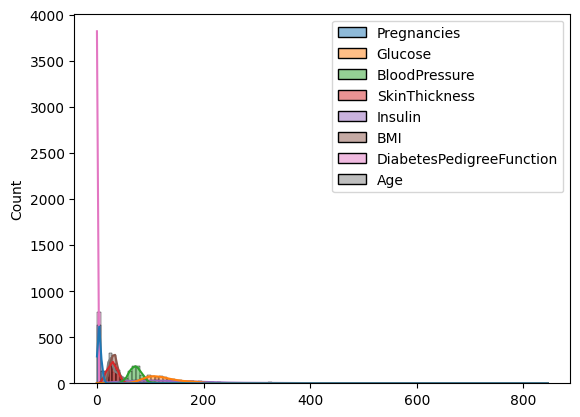

In [ ]:
sns.histplot(df_knn_imputed, color='purple', kde=True)

In [ ]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
scaled_standard_df = pd.DataFrame(standard_scaler.fit_transform(df_knn_imputed), columns=df_knn_imputed.columns)
print("\nStandardized DataFrame:")
scaled_standard_df


Standardized DataFrame:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.517702,0.865796,-0.026475,0.600994,-0.401487,0.169649,0.468492,1.425995
1,-1.113123,-1.197276,-0.514469,-0.011227,-0.632806,-0.842876,-0.365061,-0.190672
2,1.170032,2.011947,-0.677134,-0.521411,0.679571,-1.320208,0.604397,-0.105584
3,-1.113123,-1.066287,-0.514469,-0.623448,-0.580877,-0.625906,-0.920763,-1.041549
4,0.680785,0.505577,-2.629111,0.600994,0.117798,1.543789,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.822362,-0.673321,0.298854,1.927473,0.231097,0.068396,-0.908682,2.532136
764,-0.786958,0.014370,-0.189140,-0.215300,0.443532,0.632517,-0.398282,-0.531023
765,0.191537,-0.018378,-0.026475,-0.623448,-0.410929,-0.900734,-0.685193,-0.275760
766,-1.113123,0.145358,-1.002464,0.447939,-0.302351,-0.336613,-0.371101,1.170732


<Axes: ylabel='Count'>

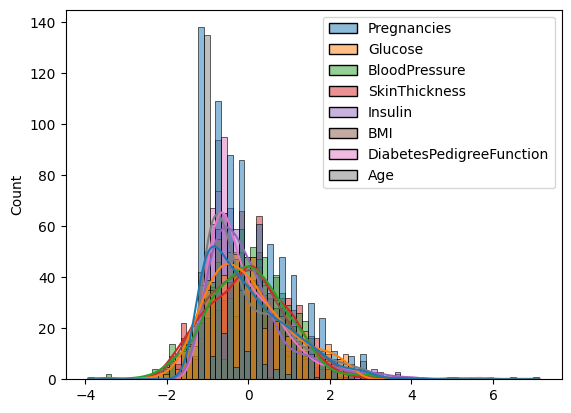

In [ ]:
sns.histplot(scaled_standard_df, color='purple', kde=True)

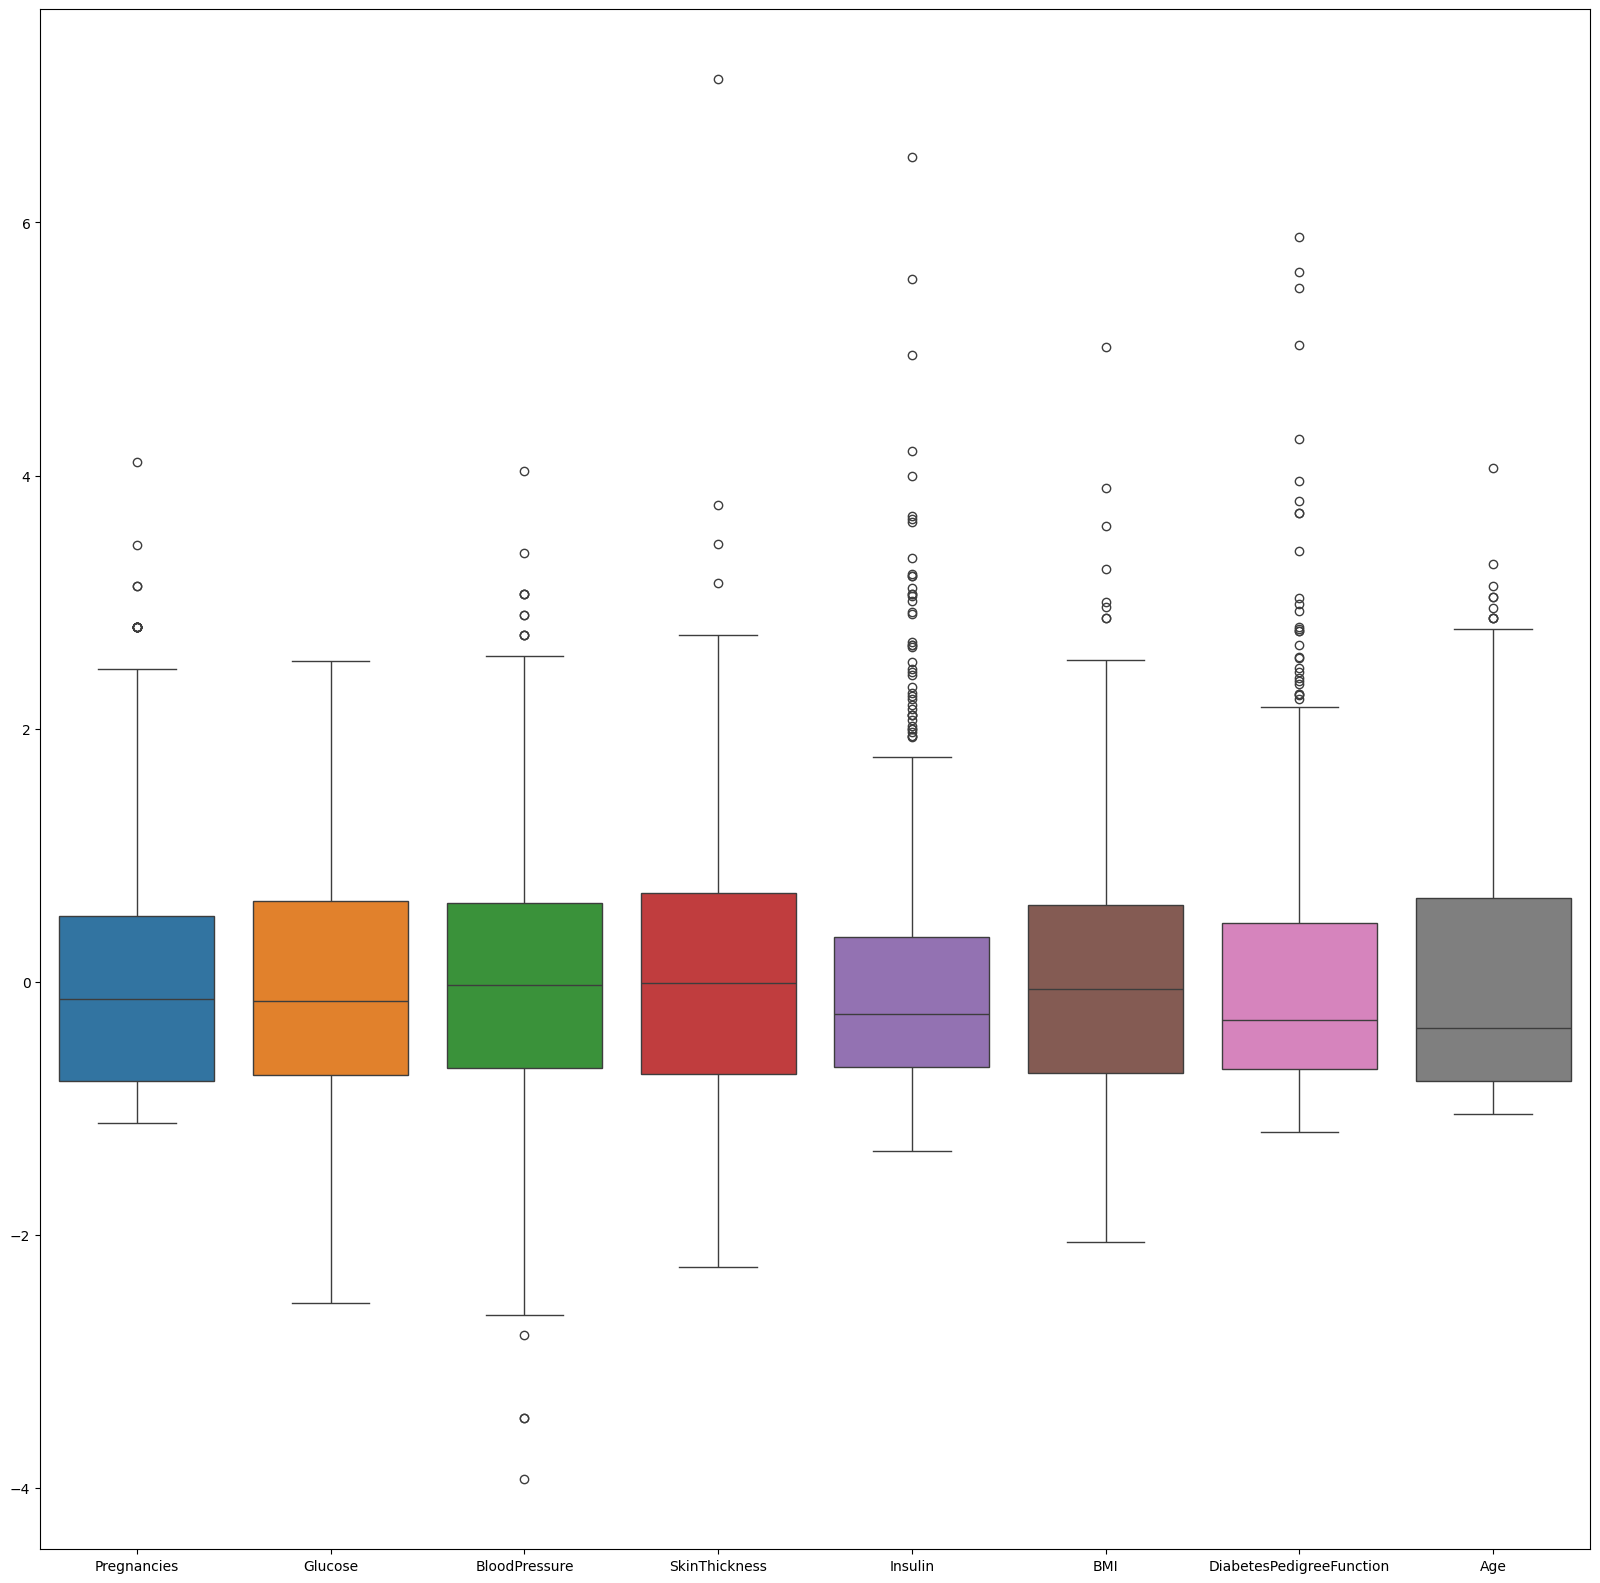

In [ ]:
plt.figure(figsize=(20,20))
sns.boxplot(data=scaled_standard_df)
plt.show()

In [ ]:


def handle_outliers(df, target, method='remove'):



    for column in df.select_dtypes(include=[float, int]).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        median_value = df[column].median()

        if method == 'remove':
            mask = (df[column] >= lower_bound) & (df[column] <= upper_bound)
            df = df[mask]
            target = target[mask]
        elif method == 'cap':
            df[column] = df[column].apply(
                lambda x: median_value if x < lower_bound or x > upper_bound else x
            )
    return df, target



# Remove outliers
df_no_outliers_X, target_no_outliers = handle_outliers(scaled_standard_df, y, method='remove')

# Cap outliers
df_capped_outliers_X, target_capped_outliers = handle_outliers(scaled_standard_df, y, method='cap')

# Verify the results
print("Original DataFrame shape:", scaled_standard_df.shape)
print("DataFrame shape after removing outliers:", df_no_outliers_X.shape)
print("DataFrame shape after capping outliers:", df_capped_outliers_X.shape)


Original DataFrame shape: (768, 8)
DataFrame shape after removing outliers: (647, 8)
DataFrame shape after capping outliers: (768, 8)


In [ ]:
y.shape

(768,)

In [ ]:
target_no_outliers.shape

(647,)

In [ ]:
df_no_outliers_X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.517702,0.865796,-0.026475,0.600994,-0.401487,0.169649,0.468492,1.425995
1,-1.113123,-1.197276,-0.514469,-0.011227,-0.632806,-0.842876,-0.365061,-0.190672
2,1.170032,2.011947,-0.677134,-0.521411,0.679571,-1.320208,0.604397,-0.105584
3,-1.113123,-1.066287,-0.514469,-0.623448,-0.580877,-0.625906,-0.920763,-1.041549
5,0.191537,-0.182114,0.136189,-0.929558,-0.420371,-0.987522,-0.818079,-0.275760
...,...,...,...,...,...,...,...,...
763,1.822362,-0.673321,0.298854,1.927473,0.231097,0.068396,-0.908682,2.532136
764,-0.786958,0.014370,-0.189140,-0.215300,0.443532,0.632517,-0.398282,-0.531023
765,0.191537,-0.018378,-0.026475,-0.623448,-0.410929,-0.900734,-0.685193,-0.275760
766,-1.113123,0.145358,-1.002464,0.447939,-0.302351,-0.336613,-0.371101,1.170732


In [ ]:
scaled_standard_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.517702,0.865796,-0.026475,0.600994,-0.401487,0.169649,0.468492,1.425995
1,-1.113123,-1.197276,-0.514469,-0.011227,-0.632806,-0.842876,-0.365061,-0.190672
2,1.170032,2.011947,-0.677134,-0.521411,0.679571,-1.320208,0.604397,-0.105584
3,-1.113123,-1.066287,-0.514469,-0.623448,-0.580877,-0.625906,-0.920763,-1.041549
4,0.680785,0.505577,-2.629111,0.600994,0.117798,1.543789,-0.300128,-0.020496
...,...,...,...,...,...,...,...,...
763,1.822362,-0.673321,0.298854,1.927473,0.231097,0.068396,-0.908682,2.532136
764,-0.786958,0.014370,-0.189140,-0.215300,0.443532,0.632517,-0.398282,-0.531023
765,0.191537,-0.018378,-0.026475,-0.623448,-0.410929,-0.900734,-0.685193,-0.275760
766,-1.113123,0.145358,-1.002464,0.447939,-0.302351,-0.336613,-0.371101,1.170732


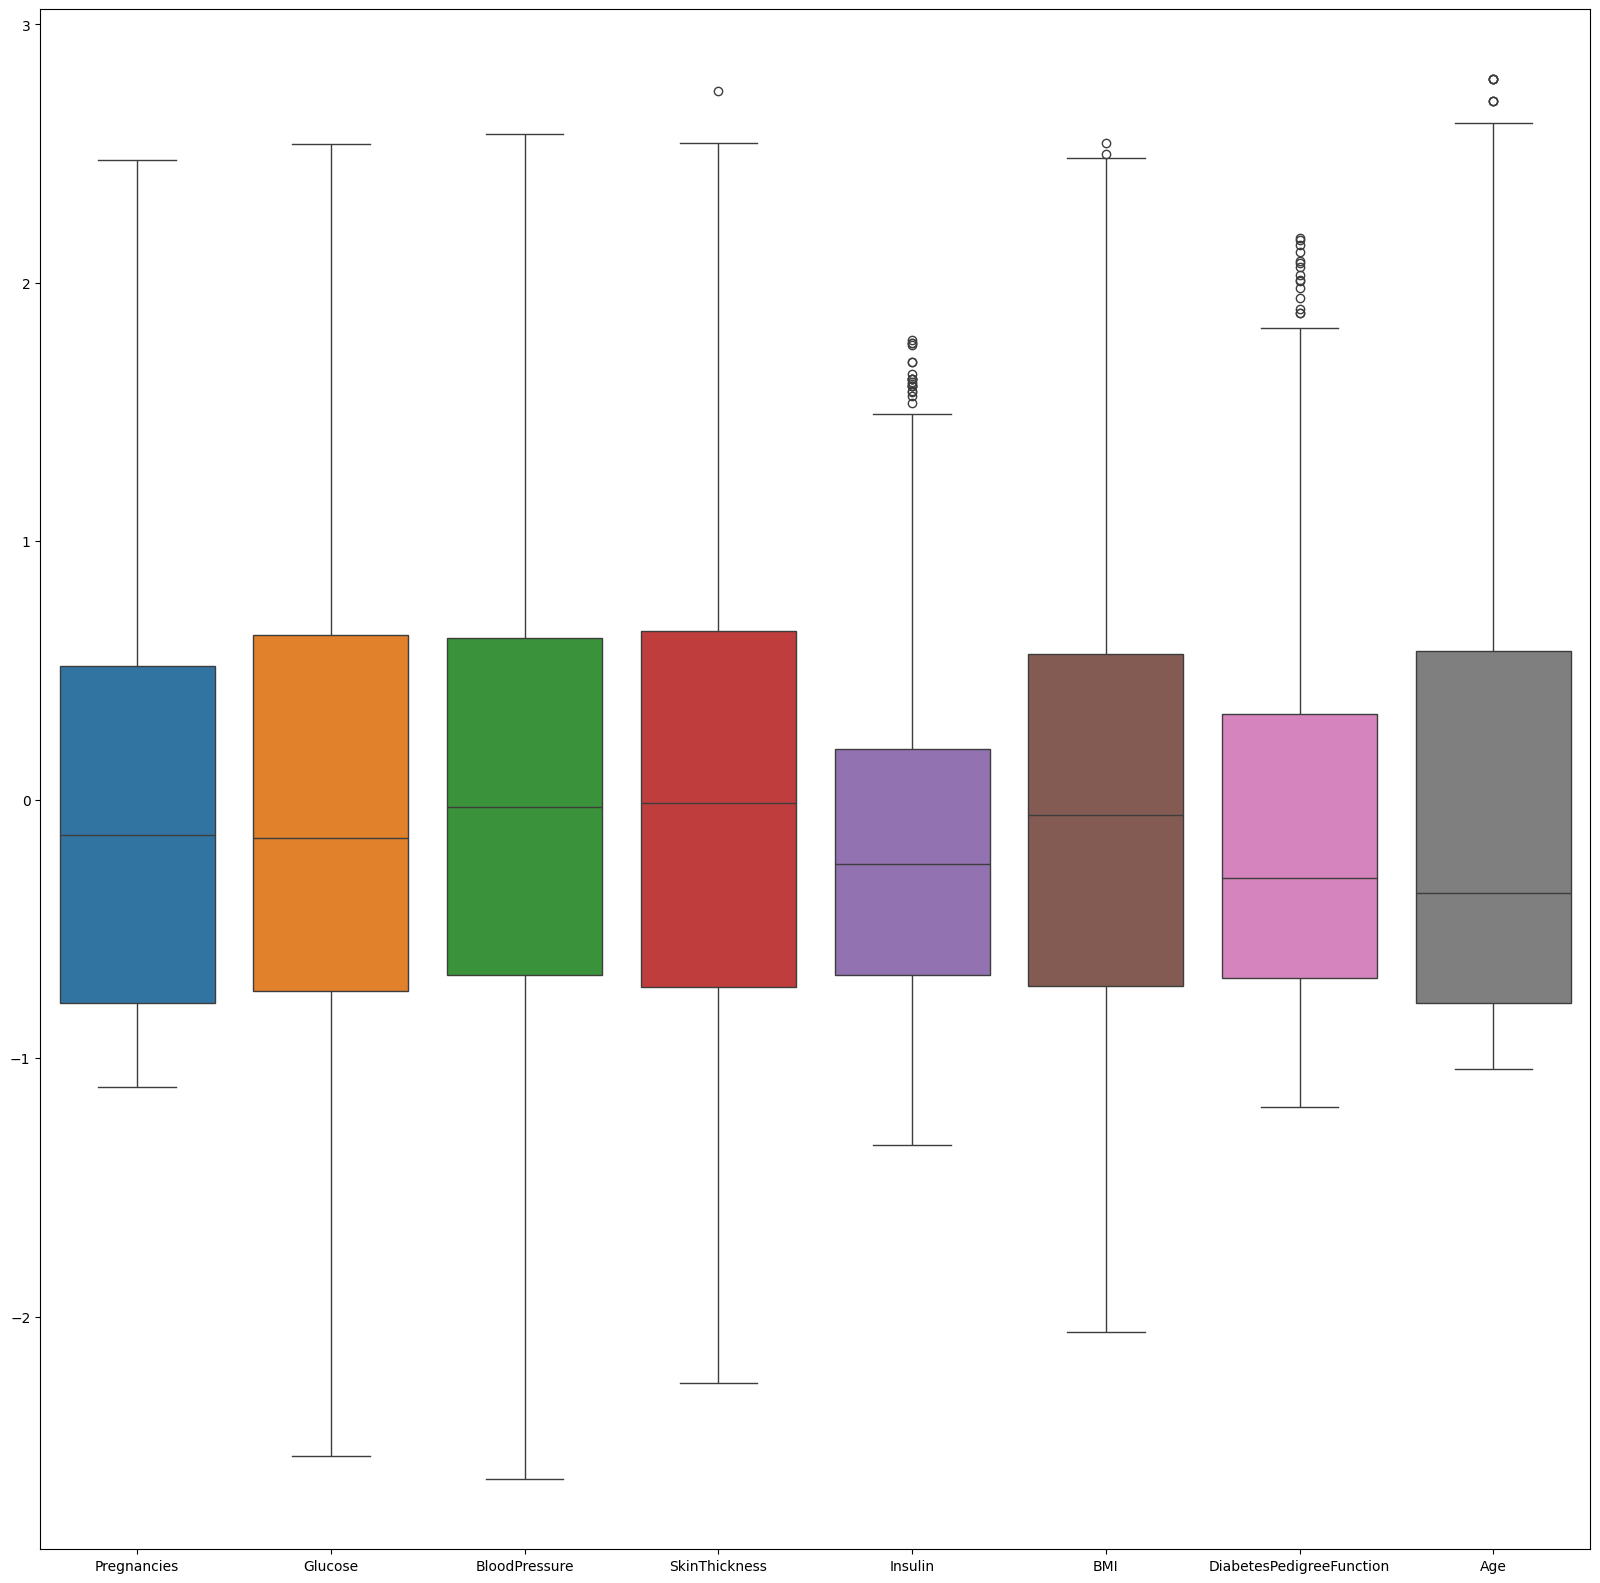

In [ ]:
plt.figure(figsize=(20,20))
sns.boxplot(data=df_capped_outliers_X)
plt.show()

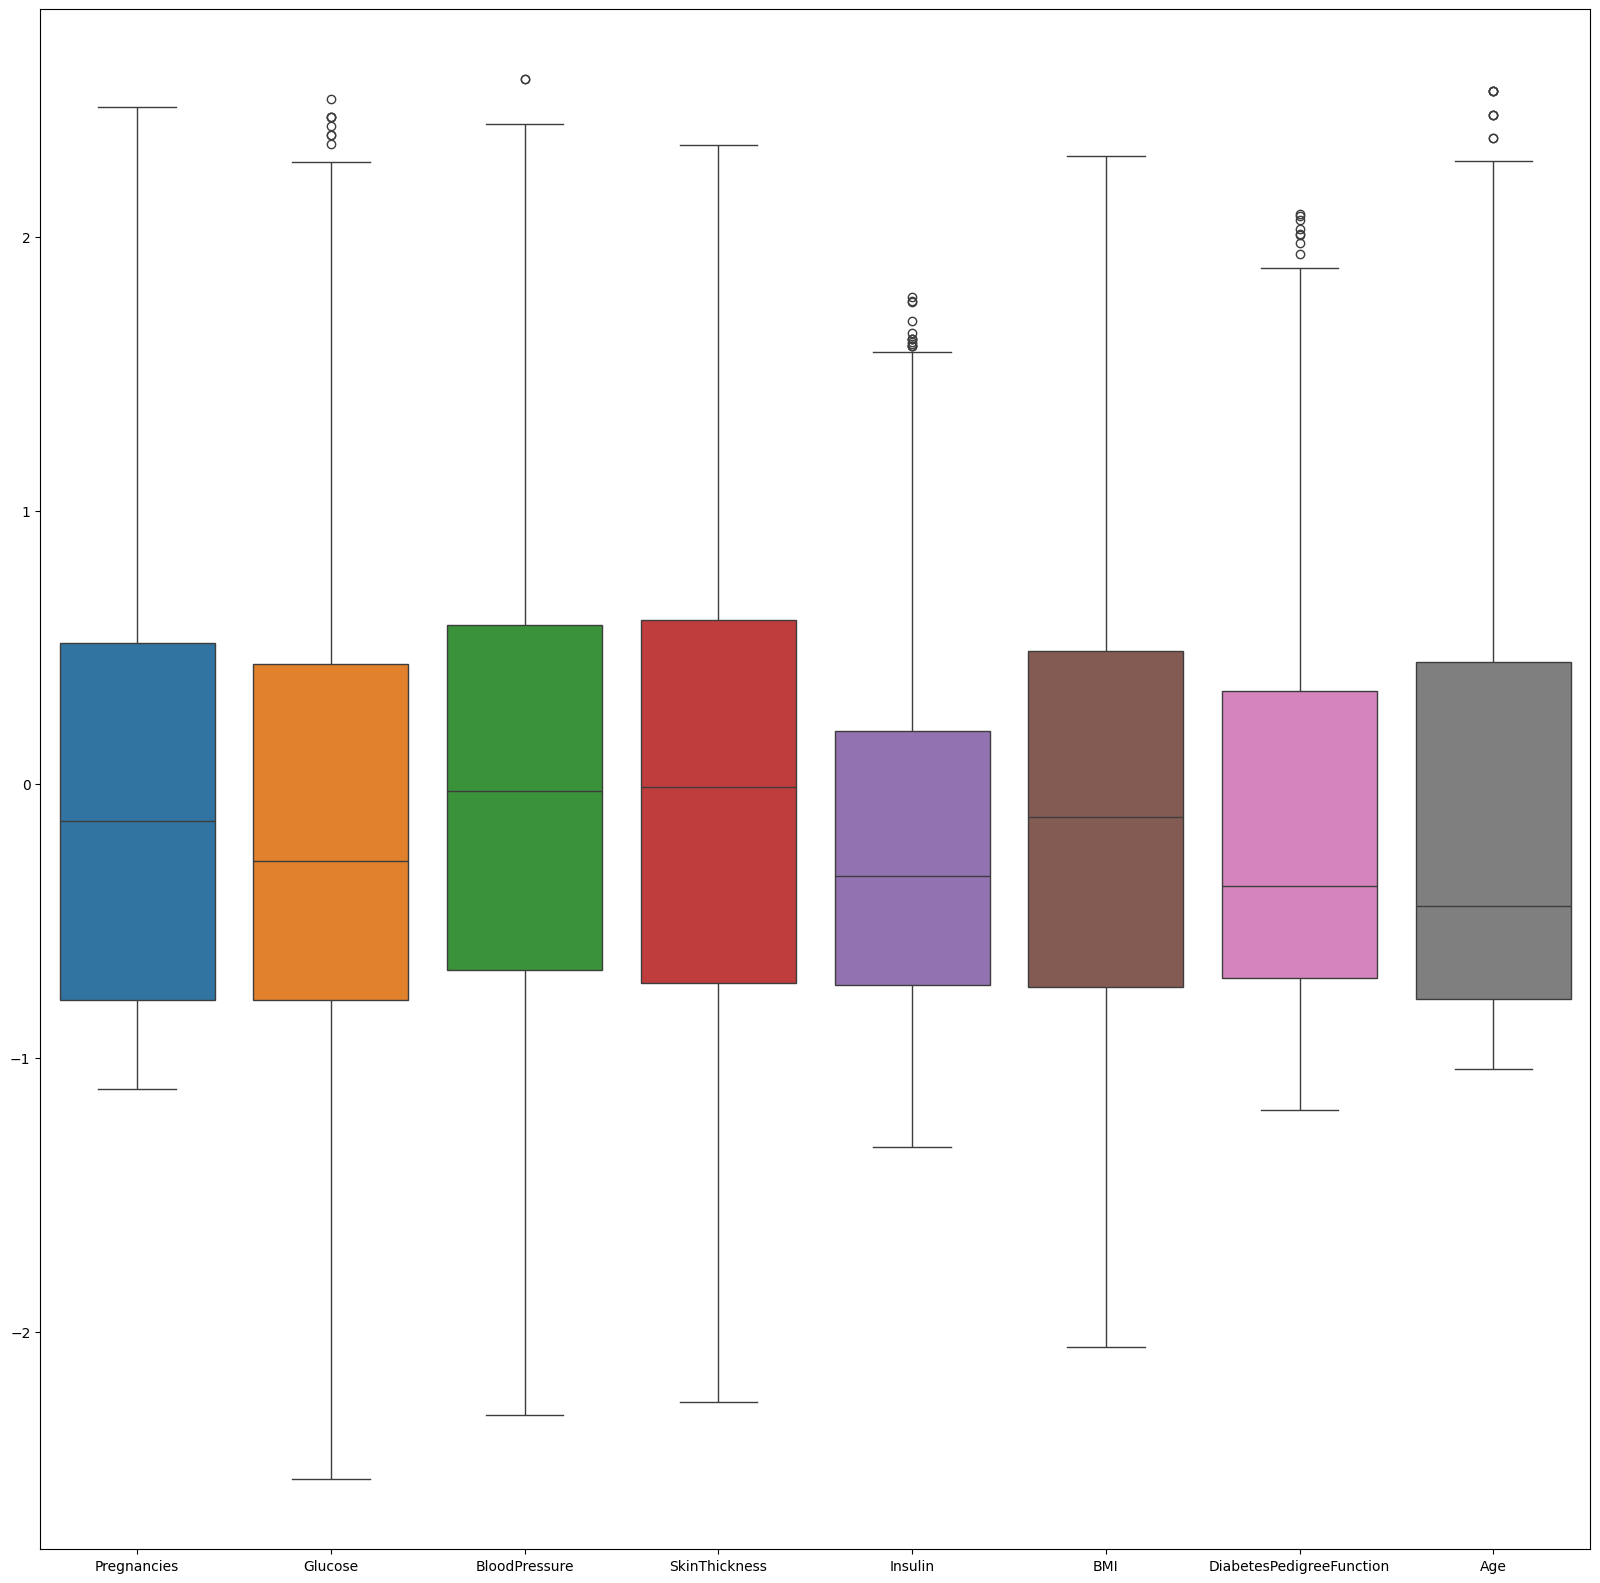

In [ ]:
plt.figure(figsize=(20,20))
sns.boxplot(data=df_no_outliers_X)
plt.show()

In [ ]:
df_no_outliers_X['Insulin'].value_counts()

Insulin
-0.146565    12
-0.477020    11
 0.042266    11
-0.240981    10
-0.288189    10
             ..
 0.608759     1
-0.226819     1
-1.071838     1
 0.037545     1
-0.302351     1
Name: count, Length: 298, dtype: int64

In [ ]:
target_capped_outliers

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [ ]:
df_capped_outliers_X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.517702,0.865796,-0.026475,0.600994,-0.401487,0.169649,0.468492,1.425995
1,-1.113123,-1.197276,-0.514469,-0.011227,-0.632806,-0.842876,-0.365061,-0.190672
2,1.170032,2.011947,-0.677134,-0.521411,0.679571,-1.320208,0.604397,-0.105584
3,-1.113123,-1.066287,-0.514469,-0.623448,-0.580877,-0.625906,-0.920763,-1.041549
4,0.680785,0.505577,-2.629111,0.600994,0.117798,1.543789,-0.300128,-0.020496
...,...,...,...,...,...,...,...,...
763,1.822362,-0.673321,0.298854,1.927473,0.231097,0.068396,-0.908682,2.532136
764,-0.786958,0.014370,-0.189140,-0.215300,0.443532,0.632517,-0.398282,-0.531023
765,0.191537,-0.018378,-0.026475,-0.623448,-0.410929,-0.900734,-0.685193,-0.275760
766,-1.113123,0.145358,-1.002464,0.447939,-0.302351,-0.336613,-0.371101,1.170732


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_capped_outliers_X, target_capped_outliers, test_size=0.33, random_state=42)

In [ ]:
y_train.value_counts()

Outcome
0    332
1    182
Name: count, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check resampled class distribution
print("\nResampled class distribution:")
print(pd.Series(y_train_resampled).value_counts())


Resampled class distribution:
Outcome
0    332
1    332
Name: count, dtype: int64


In [ ]:
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression()
classification.fit(X_train_resampled, y_train_resampled)

LogisticRegression()

In [ ]:
y_predictions = classification.predict(X_test)
print(y_predictions)

[0 0 0 0 1 1 0 1 1 1 0 1 1 0 0 1 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1
 0 1 1 0 1 1 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0
 1 1 0 1 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1
 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 1 1 1 0
 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0]


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predictions)

0.6968503937007874

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_predictions))

              precision    recall  f1-score   support

           0       0.81      0.71      0.76       168
           1       0.54      0.66      0.60        86

    accuracy                           0.70       254
   macro avg       0.67      0.69      0.68       254
weighted avg       0.72      0.70      0.70       254



In [ ]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
knn = KNeighborsClassifier()

In [ ]:
knn.fit(X_train_resampled, y_train_resampled)

KNeighborsClassifier()

In [ ]:
y_prediction_knn = knn.predict(X_test)
y_prediction_knn

array([1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0])

In [ ]:
print("Confusion Matrix")
print(confusion_matrix(y_test, y_prediction_knn))

Confusion Matrix
[[108  60]
 [ 21  65]]


In [ ]:
print("Classification Report")
print(classification_report(y_test, y_prediction_knn))

Classification Report
              precision    recall  f1-score   support

           0       0.84      0.64      0.73       168
           1       0.52      0.76      0.62        86

    accuracy                           0.68       254
   macro avg       0.68      0.70      0.67       254
weighted avg       0.73      0.68      0.69       254



In [ ]:
from sklearn.naive_bayes import GaussianNB
model_gaussian_naive_bayes = GaussianNB()
model_gaussian_naive_bayes.fit(X_train_resampled, y_train_resampled)

GaussianNB()

In [ ]:
y_predict_gaussian_naive_bayes = model_gaussian_naive_bayes.predict(X_test)
print(y_predict_gaussian_naive_bayes)

[1 0 0 0 1 1 0 1 1 1 0 1 1 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 0 1 1 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 1 0
 0 1 0 0 0 1 1 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 1 0 1 0 1 1 1 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0
 1 1 0 1 1 0 0 1 0 1 1 0 1 1 0 0 0 1 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1 1 1 1 1
 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 1 1 0 0 0 0 1 0 1 0 1 1 1 0
 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 1 0]


In [ ]:
print("Confusion Matrix")
print(confusion_matrix(y_test, y_predict_gaussian_naive_bayes))

Confusion Matrix
[[113  55]
 [ 23  63]]


In [ ]:
print("Classification Report")
print(classification_report(y_test, y_predict_gaussian_naive_bayes))

Classification Report
              precision    recall  f1-score   support

           0       0.83      0.67      0.74       168
           1       0.53      0.73      0.62        86

    accuracy                           0.69       254
   macro avg       0.68      0.70      0.68       254
weighted avg       0.73      0.69      0.70       254



In [ ]:
accuracy_score(y_test, y_predict_gaussian_naive_bayes)

0.6929133858267716